BSC Capacity for different error probabilities:
Pe = 0.00: Capacity = 1.0000 bits
Pe = 0.10: Capacity = 0.5310 bits
Pe = 0.25: Capacity = 0.1887 bits
Pe = 0.50: Capacity = 0.0000 bits
Pe = 0.75: Capacity = 0.1887 bits
Pe = 0.90: Capacity = 0.5310 bits
Pe = 1.00: Capacity = 1.0000 bits


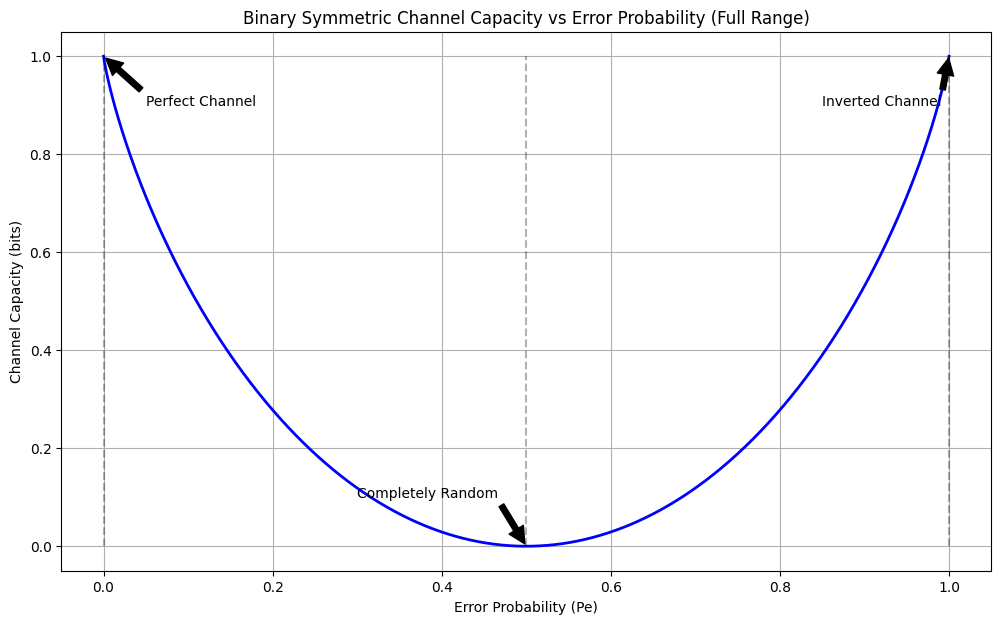

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def binary_entropy(p):
    """
    Calculate the binary entropy function H(p) = -p*log2(p) - (1-p)*log2(1-p)
    Handles edge cases where p = 0 or 1
    """
    if p == 0 or p == 1:
        return 0

    return -p * np.log2(p) - (1-p) * np.log2(1-p)

def bsc_capacity(pe):
    """
    Calculate the capacity of a Binary Symmetric Channel
    with error probability pe. Works for full range 0 ≤ pe ≤ 1
    """
    # For Pe > 0.5, the capacity is the same as for (1-Pe)
    # This is because we can "flip" our interpretation of the received bits
    effective_pe = min(pe, 1 - pe)
    return 1 - binary_entropy(effective_pe)

def plot_bsc_capacity_full_range():
    # Generate error probabilities from 0 to 1
    pe_values = np.linspace(0, 1, 1000)

    # Calculate capacity for each pe
    capacities = [bsc_capacity(pe) for pe in pe_values]

    # Create the plot
    plt.figure(figsize=(12, 7))
    plt.plot(pe_values, capacities, 'b-', linewidth=2, label='Channel Capacity')

    # Add vertical lines at key points
    plt.plot([0, 0], [0, 1], 'k--', alpha=0.3)  # Pe = 0
    plt.plot([0.5, 0.5], [0, 1], 'k--', alpha=0.3)  # Pe = 0.5
    plt.plot([1, 1], [0, 1], 'k--', alpha=0.3)  # Pe = 1

    # Add annotations
    plt.annotate('Perfect Channel', xy=(0, 1), xytext=(0.05, 0.9),
                arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate('Completely Random', xy=(0.5, 0), xytext=(0.3, 0.1),
                arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate('Inverted Channel', xy=(1, 1), xytext=(0.85, 0.9),
                arrowprops=dict(facecolor='black', shrink=0.05))

    # Customize the plot
    plt.grid(True)
    plt.title('Binary Symmetric Channel Capacity vs Error Probability (Full Range)')
    plt.xlabel('Error Probability (Pe)')
    plt.ylabel('Channel Capacity (bits)')

    return plt

# Example usage
if __name__ == "__main__":
    # Calculate capacity for example error probabilities across full range
    test_pe_values = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

    print("BSC Capacity for different error probabilities:")
    for pe in test_pe_values:
        capacity = bsc_capacity(pe)
        print(f"Pe = {pe:.2f}: Capacity = {capacity:.4f} bits")

    # Create and show the plot
    plt = plot_bsc_capacity_full_range()
    plt.show()